### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
You have to predict the rings of each abalone which will lead us to the age of that abalone. 

### Importing required libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.stats import zscore
import scikitplot as skplt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\Abalone Case Study.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape # check no of row and column

(4177, 9)

### Checking for Null values

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null value in our dataset

### Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There is sex feature which is object type we have convert into int.

### Checking and converting Sex feature into int

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [7]:
df['Sex'] = df['Sex'].replace({'M':0,'F':1,'I':2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Statistical data 

In [8]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Relation feature and label


In [9]:
df.groupby('Sex')['Rings'].sum()

Sex
0    16358
1    14546
2    10589
Name: Rings, dtype: int64

### Understanding our dataset through Visualization

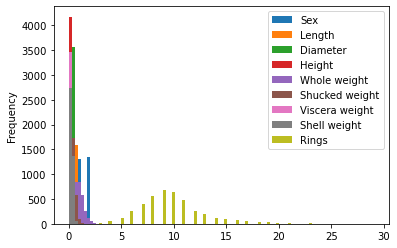

In [10]:
df.plot(kind = 'hist', bins= 100)
plt.show()

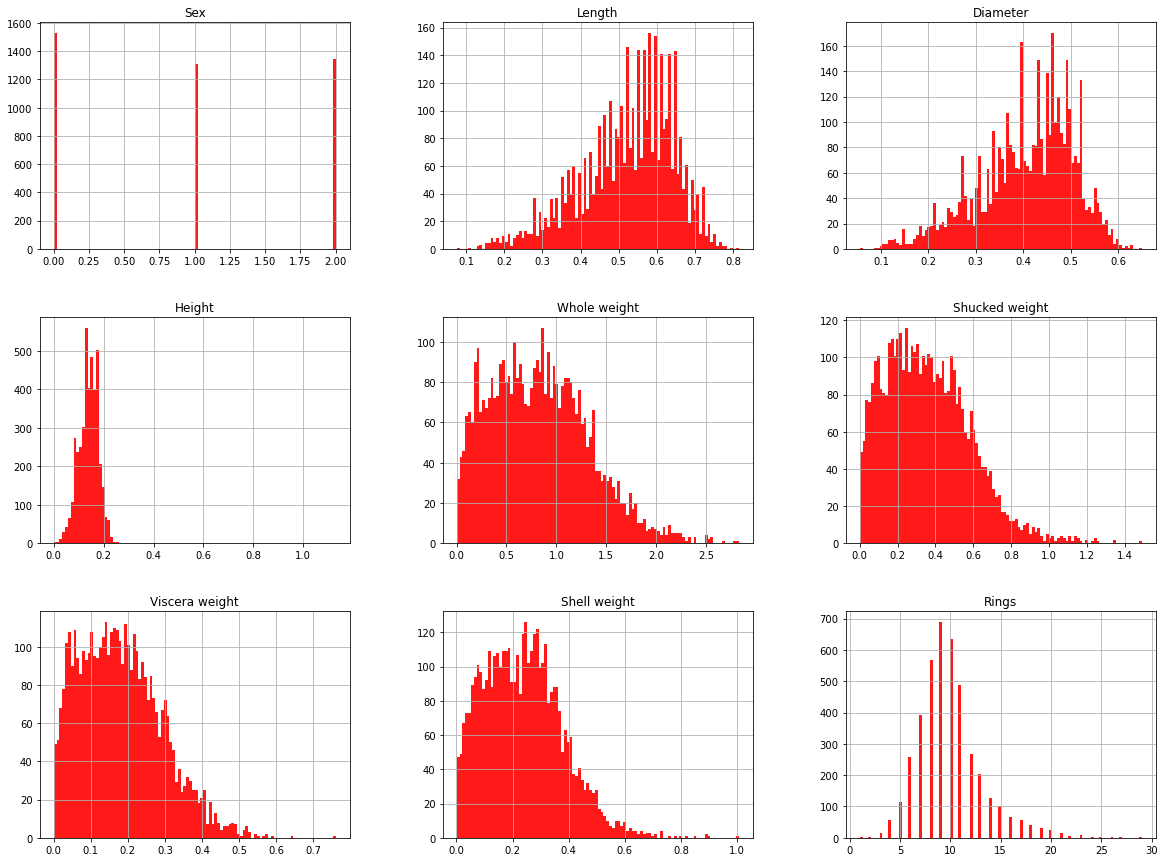

In [11]:
df.hist(color = 'r', alpha = 0.9, figsize = (20,15), bins = 100)
plt.show()

In [12]:
s = df.iloc[0]
s

Sex                0.0000
Length             0.4550
Diameter           0.3650
Height             0.0950
Whole weight       0.5140
Shucked weight     0.2245
Viscera weight     0.1010
Shell weight       0.1500
Rings             15.0000
Name: 0, dtype: float64

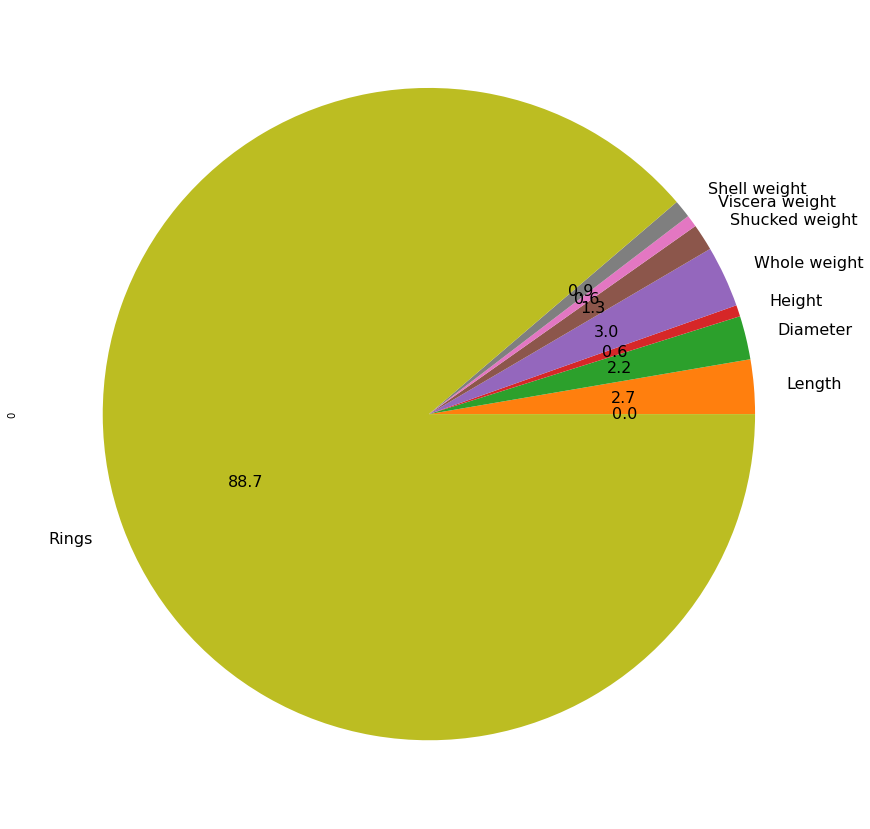

In [13]:
s.plot.pie(subplots = True, fontsize = 16, autopct = '%.1f',figsize = (20,15))
plt.show()

Abalone cover 88.7% of shell.

df.plot.scatter(x = 'Rings', y = 'Sex' , color = 'r')
plt.show()

Female has more no of Rings amongs other 

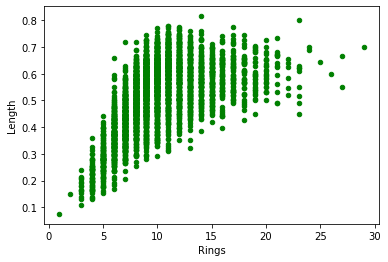

In [14]:
df.plot.scatter(x = 'Rings', y = 'Length' , color = 'g')
plt.show()

As we see above scattern plot as length increase no of Rings increase 

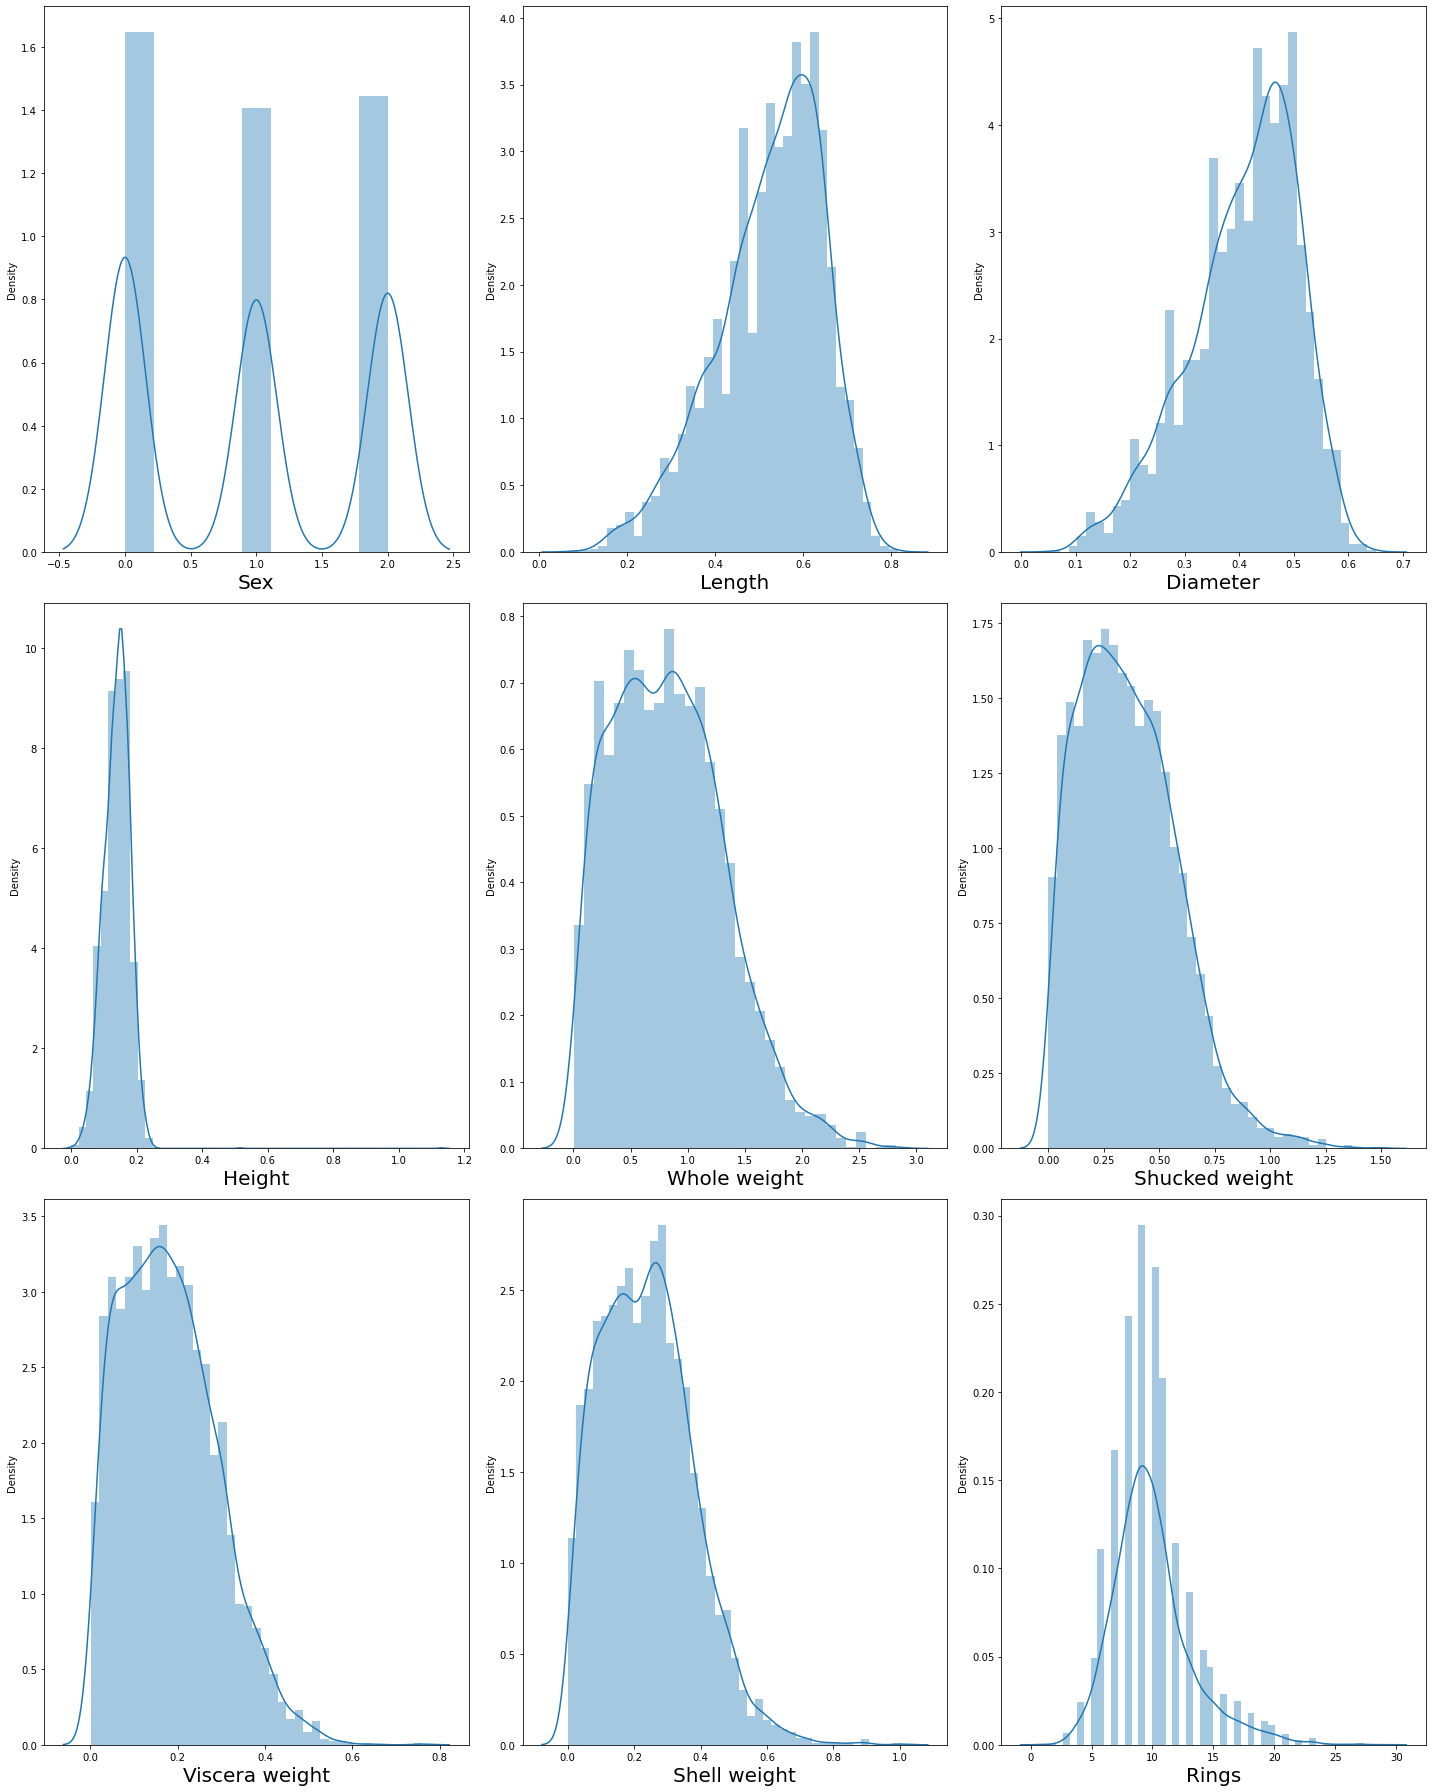

In [15]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Observations : Some features is little skewed. 

### Checking for Imbalance Label

In [16]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

### Corelation of Feature vs Label using Heat map

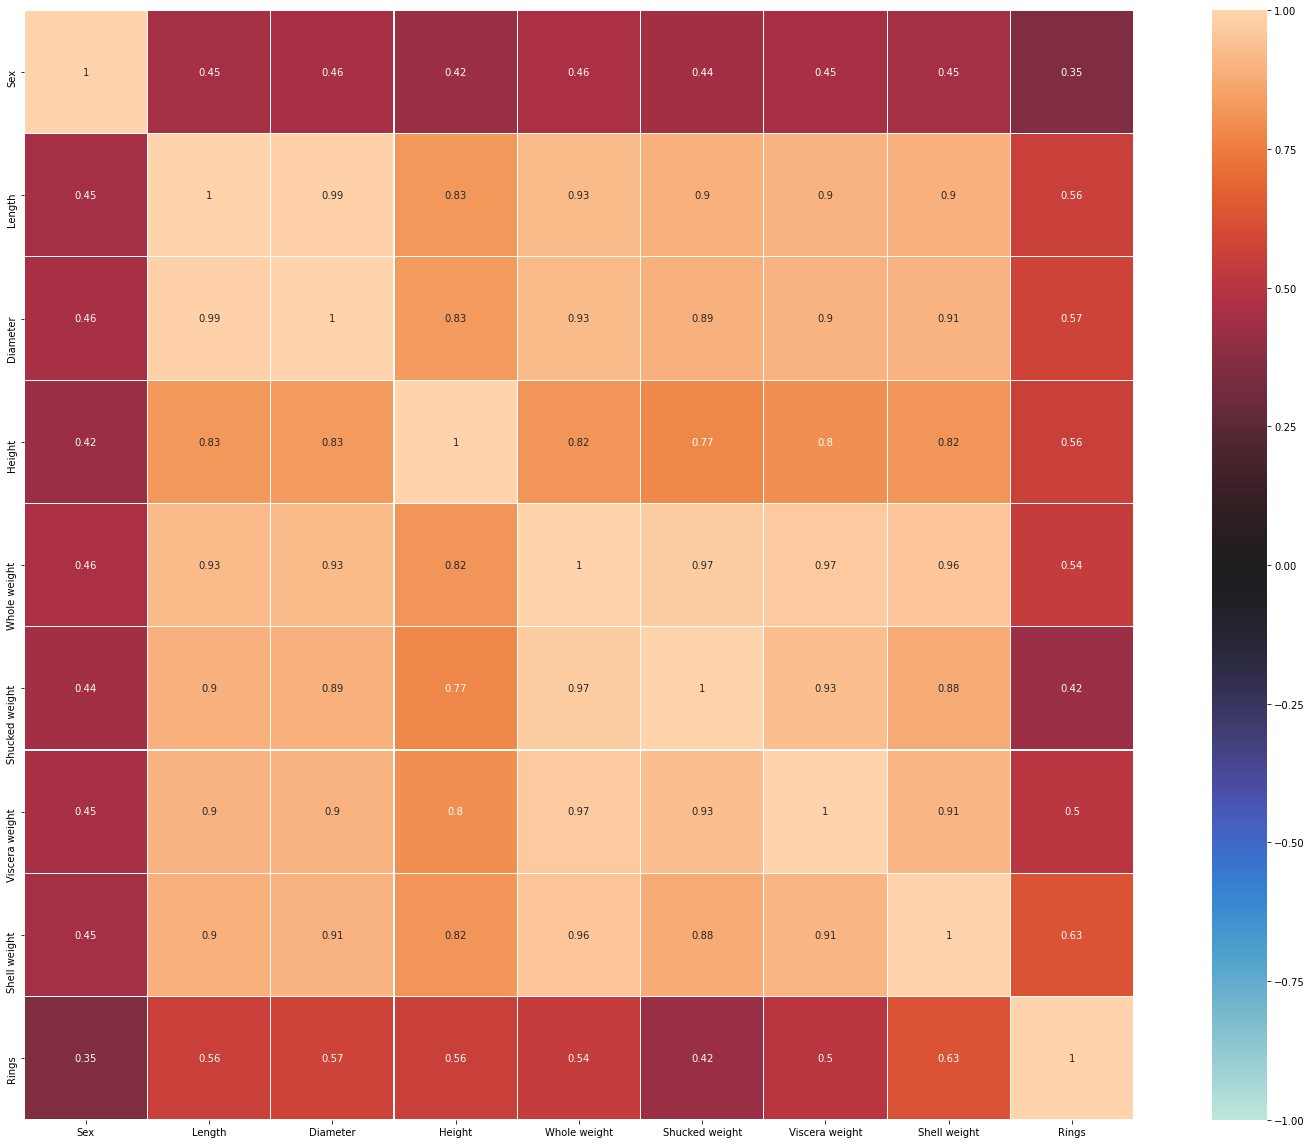

In [17]:
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

All features are related 

### Checking Outliers

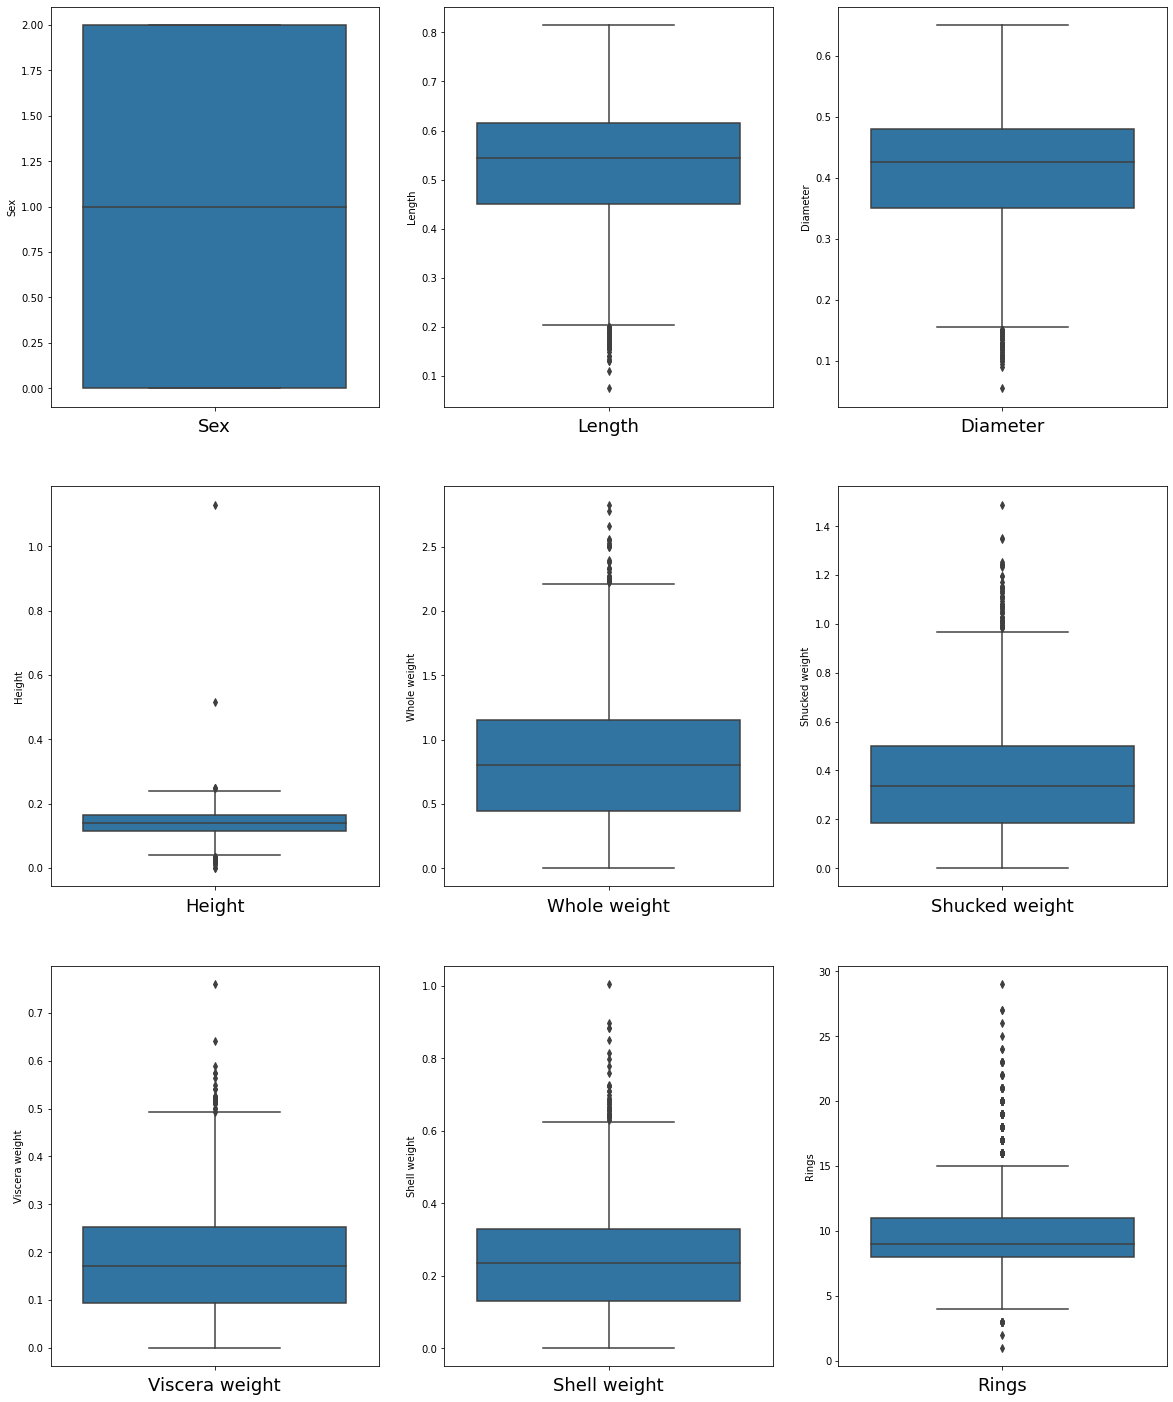

In [18]:
# Visualize the outliers using boxplot
plt.figure(figsize = (20,25))
graph = 1

for column in df:
    if graph <=9:
        ax = plt.subplot(3,3, graph)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    graph +=1
plt.show()

There are outliers presents in dataset.

### Removing Outliers using Zscore

In [19]:
# with std 3 Lets see the stats

z_score = zscore(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]

In [29]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,0.961557,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.828255,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000



Distribution Plot :-



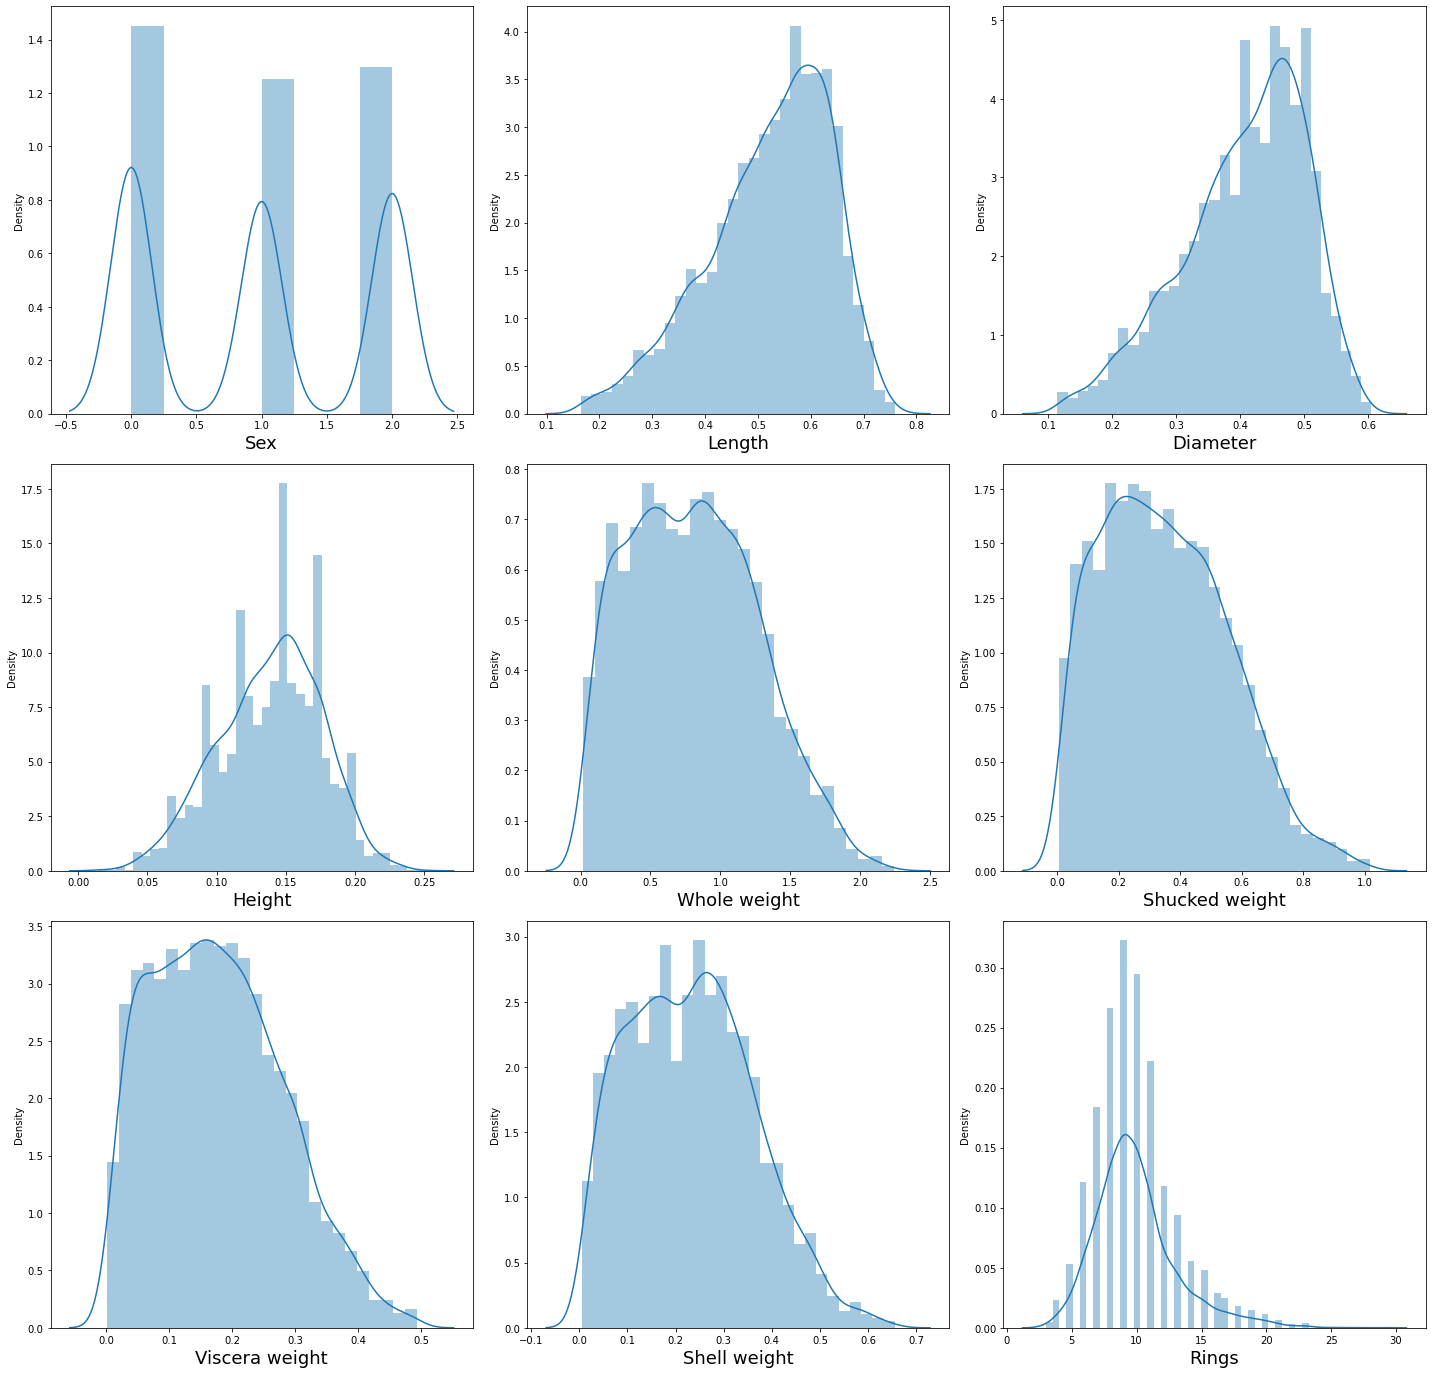

In [20]:
# Let' see outliers are removed in columns or not.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

It removes outliers.m

In [21]:
df.shape # Here we check shape of remaining data after removal of outliers.

(4084, 9)

### Checking for Skewness

In [22]:
df.skew()

Sex               0.071702
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

There is some skewness but we kept it because it cause data loss.

### Spliting Dataset into features and labels

In [23]:
x = df.drop('Rings', axis = 1)
y = df.Rings


Distribution Plot :-



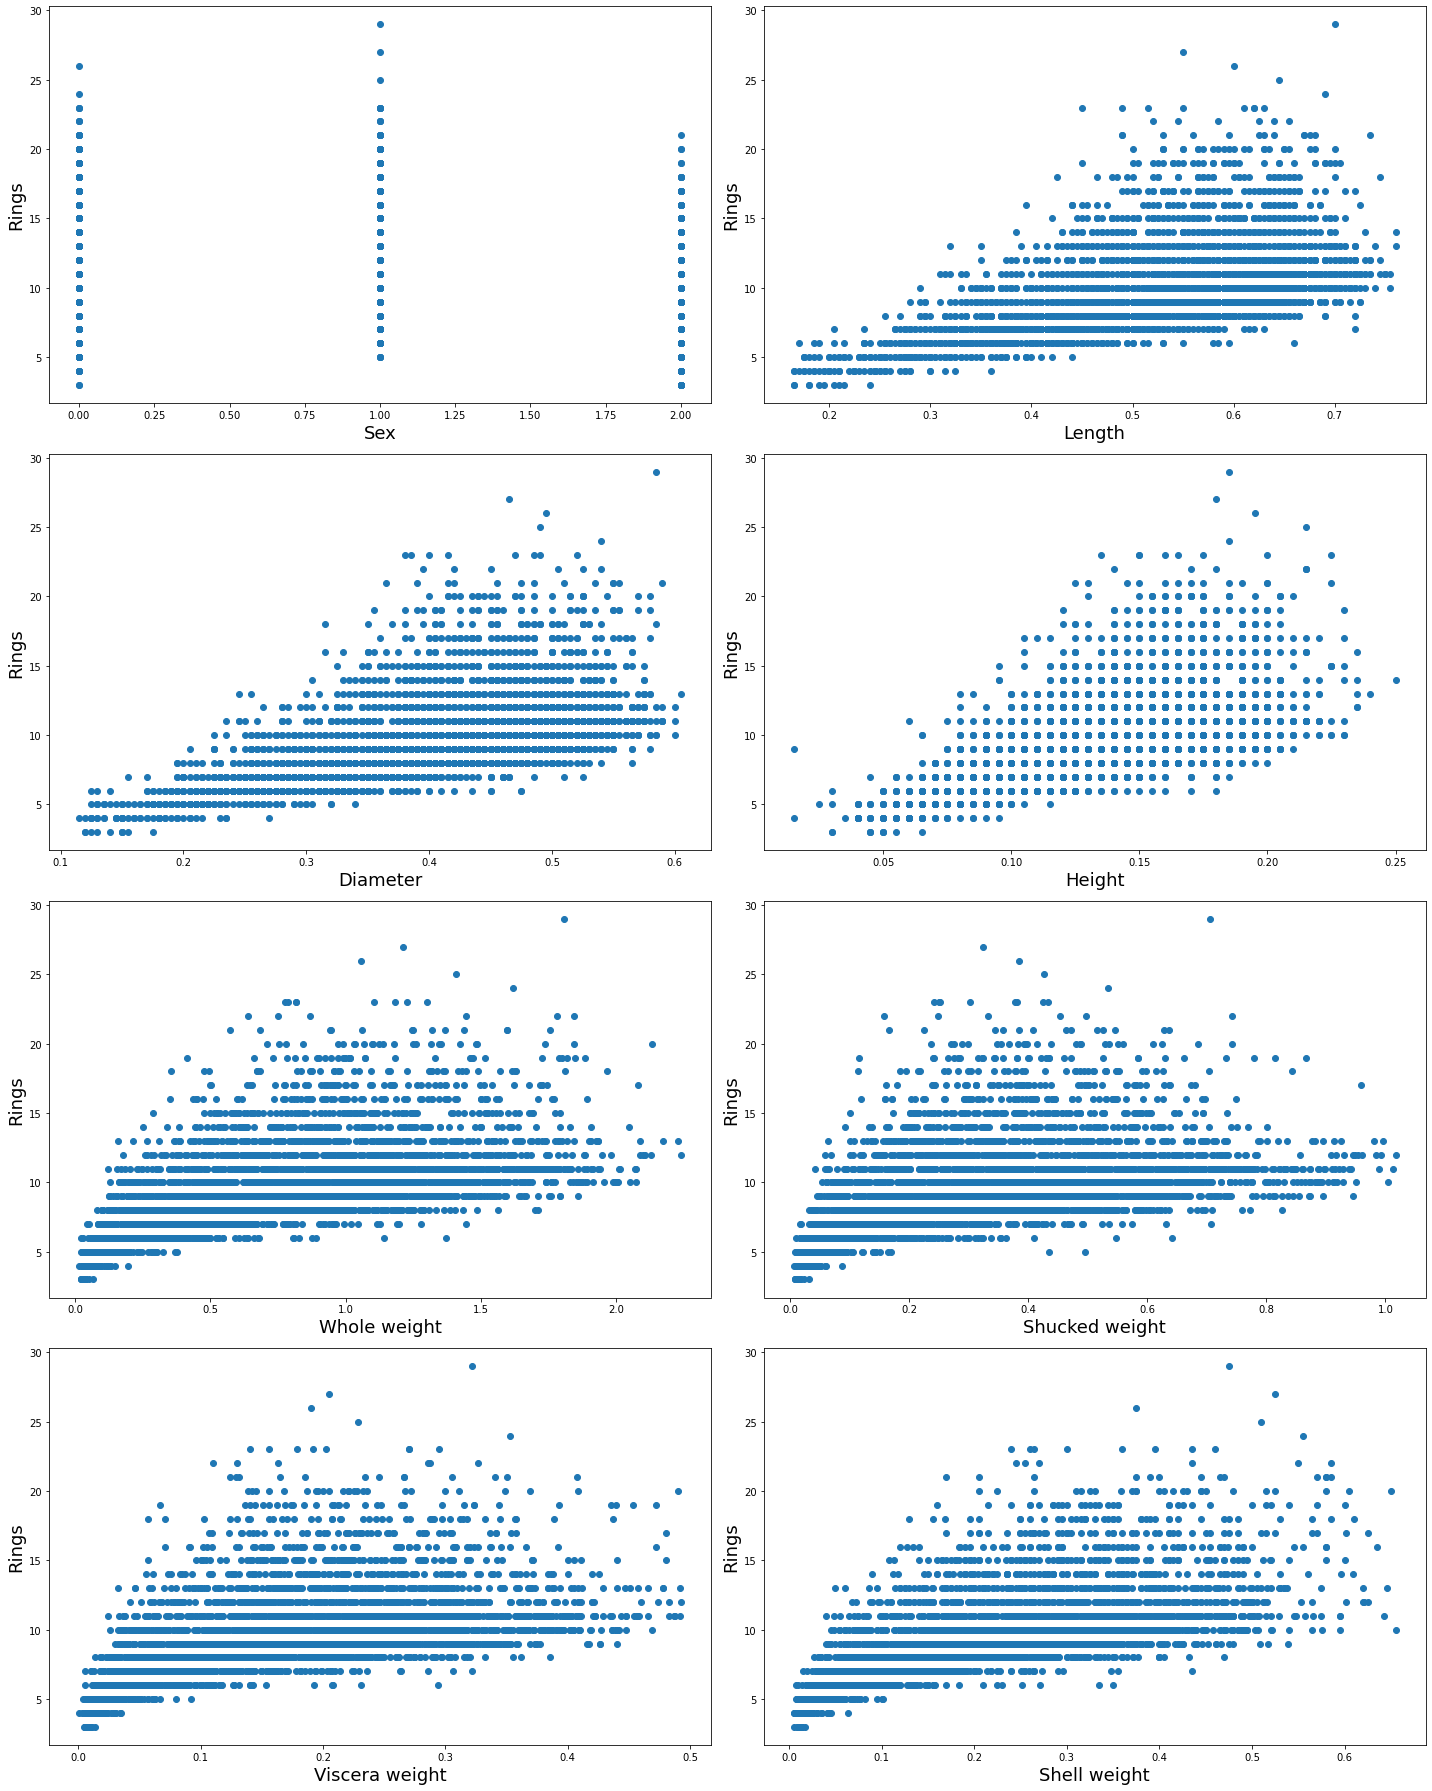

In [24]:
# Let' see revation between features and labels.
print('\nDistribution Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=8:
        ax = plt.subplot(4,2, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Rings', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

### Handling Class Imbalance

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros  = RandomOverSampler()
x_over, y_over = ros.fit_resample(x, y)

In [26]:
y_over.value_counts()

16    686
17    686
14    686
29    686
13    686
12    686
27    686
11    686
26    686
10    686
25    686
9     686
24    686
8     686
23    686
7     686
22    686
6     686
21    686
5     686
20    686
4     686
19    686
3     686
18    686
15    686
Name: Rings, dtype: int64

### Data Scaling

In [27]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.16108558, -0.5798883 , -0.43102345, ..., -0.61064456,
        -0.73148499, -0.64218694],
       [-1.16108558, -1.48745122, -1.47447322, ..., -1.21802438,
        -1.23959876, -1.26010684],
       [ 0.04641977,  0.06837092,  0.14287393, ..., -0.45515533,
        -0.33951152, -0.17874702],
       ...,
       [-1.16108558,  0.67341287,  0.7167713 , ...,  0.85192604,
         1.07352867,  0.57820485],
       [ 0.04641977,  0.88949928,  0.82111628, ...,  0.87865076,
         0.81705219,  0.48551686],
       [-1.16108558,  1.62419307,  1.55153111, ...,  2.89272223,
         1.93490248,  2.0225926 ]])

### Split data into train and test. Model will be bulit on training data and tested on test data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Building

### AdaBoost model instantiaing, training and evaluating

In [31]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

In [32]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------

Confusion Matrix :
[[173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 90  74   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 23 115   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  4  57   0   0   0   0   0   0 113   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  22   0   0   0   0   0   0 166   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0 164   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0 168   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 137   0   0   

Conclusion : Ada Boost model has 9% score.

### Cross Validation score to check if the model is overfitting

In [34]:
cv = cross_val_score(ada, x, y, cv = 5)
print('Cross Validation score of Ada Boost model --->', cv.mean())

Cross Validation score of Ada Boost model ---> 0.21743886048911606


Conclusion : Ada Boost model has 21% Cross Validation score

### ROC, AUC Curve

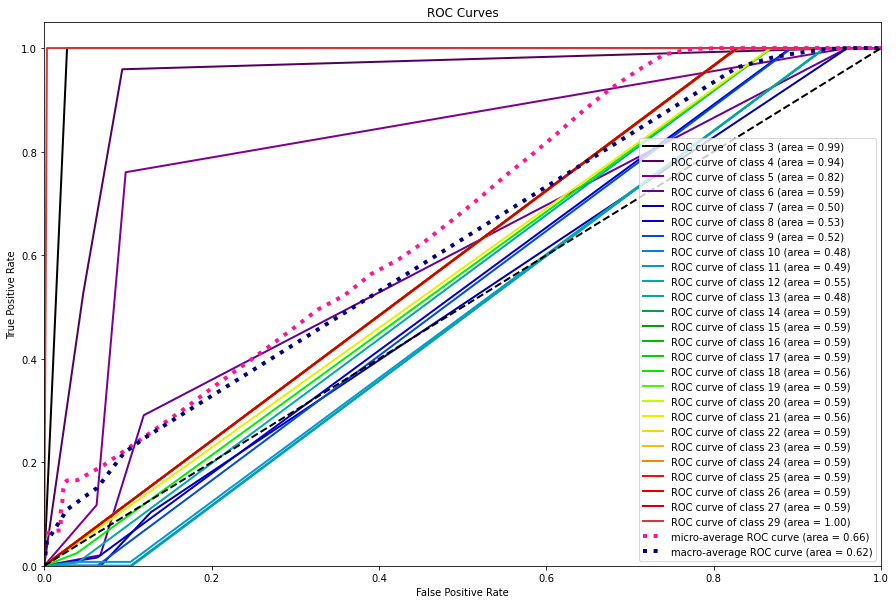

In [51]:
prob = ada.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
plt.show()

### Decision Tree model instantiaing, training and evaluating

In [35]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [36]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------

Confusion Matrix :
[[173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 183   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1 160   7   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1  12 133  19   9   3   3   3   2   0   1   2   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   4   6  19  74  31  11  10   3   3   0   0   1   2   1   0   0
    2   0   0   0   0   0   0   0]
 [  0   0   1   4  12  34  38  29  23  10   6   3   4   1   3   0   1   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   5  17  38  46  23  19   4   2   5   3   1   2   3   1
    1   0   0   0   0   0   0   1]
 [  0   0   0   2   0   5   7  12  82  11   5   

Conclusion : Decision Tree model has 89% score

### Cross Validation score to check if the model is overfitting

In [37]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.1887872897016824


Conclusion : Decision Tree model has 18% Cross Validation score

### ROC, AUC Curve

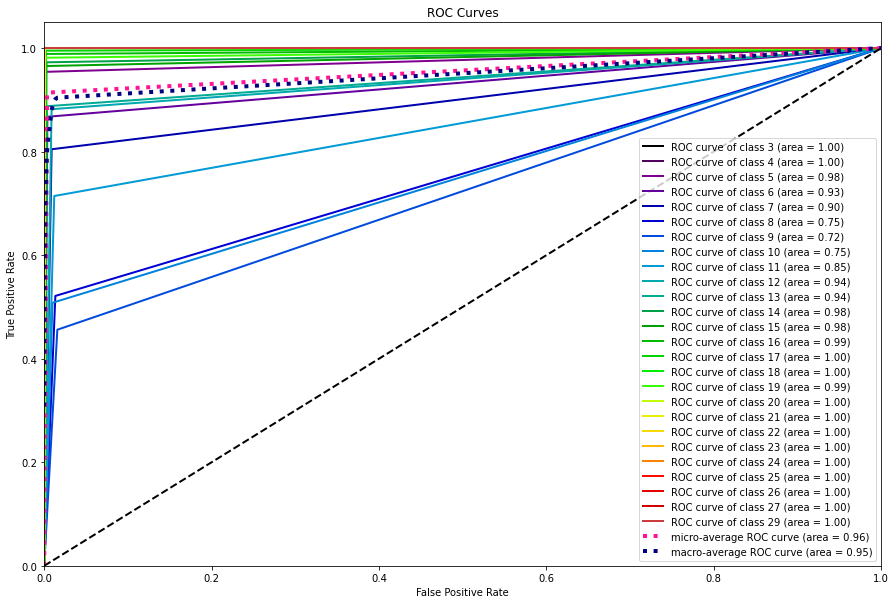

In [52]:
prob = DT.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
plt.show()

### Knn model instantiaing, training and evaluating

In [38]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [39]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   5 169   6   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1  11  22 110  22   0   1   0   5   0   1   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4  21  53  61  22   4   2   2   6   5   4   1   3   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   7  12  41  53  19   4   8   3   7   4   8   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   2   8  21  31  38  20  17  14   4   9   3   2   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   7  26  23  27  23  19  12  10  14   1   2   2   3   3
    0   0   0   0   0   0   0   0]
 [  0   0   0   5   4   4  16   9  44  15   9   

Conclusion : Knn model has 80% score

### Cross Validation score to check if the model is overfitting

In [40]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.23482492140062877


Conclusion : Knn model has 23% Cross Validation score

### ROC, AUC Curve

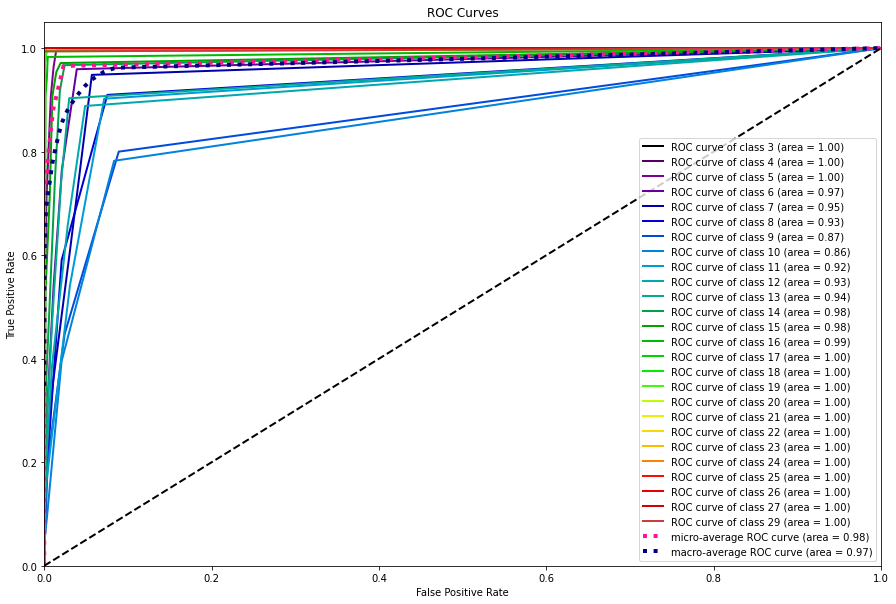

In [53]:
prob = Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [42]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [43]:
print('-----------------------------------------------------------\n')
print('Confusion Matrix :')
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print('\n----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------

Confusion Matrix :
[[173   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 171   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 183   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   6 160   6   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   3  19 128  30   4   2   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   2  11  23  88  23  10   4   1   2   1   2   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   6  12  35  54  32  16   4   5   2   2   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   2  26  35  58  22  11   6   5   4   2   1   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   1   0   2   3   8  12  88   7  11   

Conclusion : Rn model has 90% score

### Cross Validation score to check if the model is overfitting

In [44]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.2514756881944945


Conclusion : Random Forest model has 25% Cross Validation score

### ROC, AUC Curve

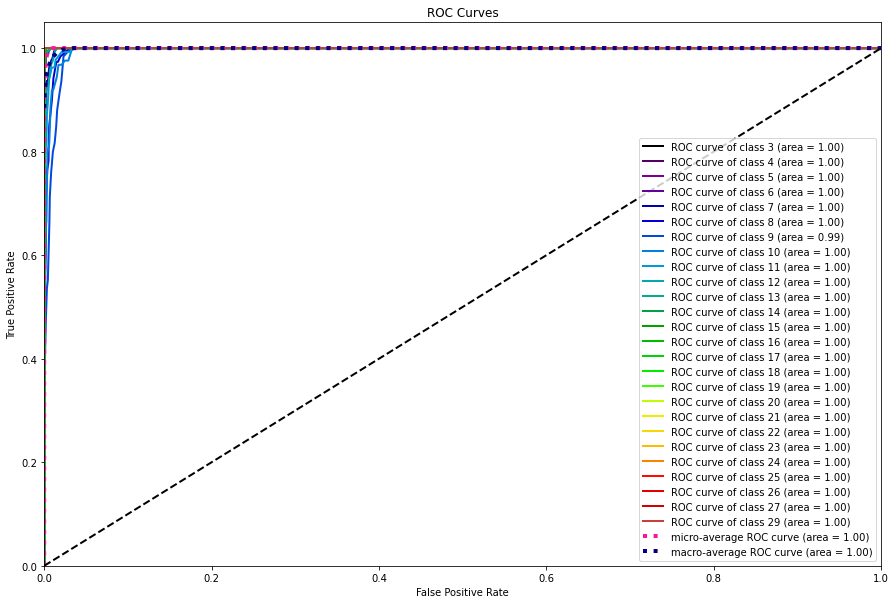

In [54]:
prob = Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
plt.show()

### Ada Boost Hyperparameter Tuning .

In [63]:
param = {'n_estimators': [50, 100],'learning_rate' : [0.30,0.40,0.45]}

In [64]:
grid_search = GridSearchCV(estimator = ada, param_grid = param, cv = 5,n_jobs = -1 )

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.45],
                         'n_estimators': [50, 100]})

In [66]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.3, 'n_estimators': 50}


In [67]:
hada = AdaBoostClassifier(learning_rate = 0.3, n_estimators= 50)
hada.fit(x_train, y_train)
hada.score(x_test, y_test)

0.13298945952007177

In [68]:
y_pred = hada.predict(x_test)

In [69]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       173
           4       0.00      0.00      0.00       171
           5       0.00      0.00      0.00       183
           6       0.17      0.78      0.27       174
           7       0.00      0.00      0.00       188
           8       0.19      0.37      0.25       167
           9       0.56      0.11      0.18       170
          10       0.20      0.02      0.04       173
          11       0.02      0.02      0.02       139
          12       0.25      0.11      0.15       150
          13       0.04      0.02      0.03       177
          14       0.10      0.22      0.14       173
          15       0.07      0.03      0.04       164
          16       0.07      0.20      0.10       171
          17       0.02      0.02      0.02       198
          18       0.14      0.02      0.04       

### After Hyperparameter Tuning model accuracy score 13%

### Saving The Model

In [70]:
# saving the model to the Local file system
filename = 'Abalone Case.pickle'
pickle.dump(hada, open(filename, 'wb'))

### Knn Hyperparameter Tuning model

In [89]:
grid_param = {'leaf_size' : [1,3,5], 'n_neighbors': [5], 
             'p':[1,2]}

In [90]:
grid_search = GridSearchCV(estimator = Knn, param_grid = grid_param, cv = 5 , n_jobs = -1)

In [91]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 3, 5], 'n_neighbors': [5],
                         'p': [1, 2]})

In [92]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}


In [94]:
hkn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)
hkn.fit(x_train, y_train)
hkn.score(x_test, y_test)

0.7986095537115945

In [95]:
y_pred = hkn.predict(x_test)

In [97]:
print('----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       173
           4       0.90      1.00      0.95       171
           5       0.77      0.91      0.84       183
           6       0.55      0.63      0.58       174
           7       0.41      0.38      0.39       188
           8       0.35      0.32      0.34       167
           9       0.29      0.19      0.23       170
          10       0.30      0.16      0.21       173
          11       0.36      0.32      0.34       139
          12       0.49      0.51      0.50       150
          13       0.62      0.50      0.55       177
          14       0.72      0.80      0.76       173
          15       0.74      0.92      0.82       164
          16       0.90      1.00      0.94       171
          17       0.96      1.00      0.98       198
          18       0.94      1.00      0.97       16

After Hyperparameter Tuning model accuracy score increase to 80% .

### Saving The Model

In [98]:
# saving the model to the Local file system
filename = 'Knn Abaline case.pickle'
pickle.dump(hkn, open(filename, 'wb'))

## Final Conclusion : Knn is our best model.
